##  Big Data Applications and Analytics - Term Project 
### Sean M. Shiverick Fall 2017

# Classification of Opioid Use: Heroin
* Logistic Regression Classifier, Decision Tree Classifier, Random Forests
* from Introduction to Machine Learning by Andreas Mueller and Sarah Guido
* Ch. 2 Supervised Learning, Classification Models

## Dataset: NSDUH-2015
* National Survey of Drug Use and Health 2015
* Substance Abuse and Metnal Health Data Archive

### Import packages
* Load forge dataset and assign variables

In [1]:
import sklearn
import mglearn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

## Part 1. Load Project dataset
* Delete first two columns and `SUICIDATT`; examine dataframe keys
* Identify features and target variable `HEROINEVR`
* Split data into Training and Test sets

In [2]:
file = pd.read_csv('project-data.csv')
opioids = pd.DataFrame(file)

opioids.drop(opioids.columns[[0,1]], axis=1, inplace=True)
del opioids['SUICATT']

opioids.shape

(57146, 20)

In [3]:
print(opioids.keys())

Index(['AGECAT', 'SEX', 'MARRIED', 'EDUCAT', 'EMPLOY18', 'CTYMETRO', 'HEALTH',
       'MENTHLTH', 'PRLMISEVR', 'PRLMISAB', 'PRLANY', 'HEROINEVR', 'HEROINUSE',
       'HEROINFQY', 'TRQLZRS', 'SEDATVS', 'COCAINE', 'AMPHETMN', 'TRTMENT',
       'MHTRTMT'],
      dtype='object')


In [4]:
opioids['HEROINEVR'].value_counts()

0    56190
1      956
Name: HEROINEVR, dtype: int64

In [5]:
features = ['AGECAT', 'SEX', 'MARRIED', 'EDUCAT', 'EMPLOY18', 
            'CTYMETRO', 'HEALTH','MENTHLTH', 'PRLMISEVR', 'PRLMISAB', 'PRLANY', 
            'TRQLZRS', 'SEDATVS', 'COCAINE', 'AMPHETMN', 'TRTMENT','MHTRTMT']

opioids.data = pd.DataFrame(opioids, columns=['AGECAT', 'SEX', 'MARRIED', 'EDUCAT', 'EMPLOY18', 
                                              'CTYMETRO', 'HEALTH','MENTHLTH', 'PRLMISEVR', 
                                              'PRLMISAB','PRLANY','TRQLZRS', 'SEDATVS', 
                                              'COCAINE', 'AMPHETMN', 'TRTMENT','MHTRTMT'])
opioids.target = opioids['HEROINEVR']

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    opioids.data, opioids.target, stratify=opioids.target, random_state=42)

## Part 2. Logistic Regression Classifier
* Decision boundary is a linear function of input
* Binary linear classifier separates two classes using a line, plane, or hyperplane

### Regularization Parameter C
#### Low values of C: 
* Model tries to correctly classify all points correctly with a straight line
* Cause models to try to adjust to the 'majority' of data points
* May not capture overall layout of classes well; model is likely OVERFITTING! 
#### High values of C: 
* Correspond to less regularization, models will fit training set as best as possible
* Stresses importance of each individual data point to be classified correctly 


## 2.1 Built Classifier Model on Training set

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

## 2.2 Evaluate Classifier Model on Test set

In [8]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.983


## 2.3 Adjust Model Parameter settings 
* Default setting `C=1` provides good performance for train and test sets
* Very likely UNDERFITTING the test data

### Higher value of C fits more 'Flexible' model
* C=100 generally gives higher training set accuracy and slightly higher Test set accuracy

In [9]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.983


### Lower value of C fits more 'regularized' model
* Setting C=0.01 leads model to try to adjust to 'majority' of data points

In [10]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.983


## 2.4 Plot Coefficients of Logistic Regression Classifier
* Main difference between linear models for classification is penalty parameter
* LogisticRegression applies `L2` (Ridge) regularization by default

### Penalty Parameter (L) 
* L2 penalty (Ridge) uses all available features, regularization C pushes toward zero 
* L1 penalty (Lasso) sets coefficients for most features to zero, uses only a subset
    * Improved interpretability with L2 penalty (Lasso)

#### L1 Regularization (Lasso)
*  Model is limited to using only a few features, more interpretable

#### Legend: Different values of Parameter C
* Stronger regularization pushes coefficients closer to zero
* Parameter values can influence values of Coefficients

Training accuracy of L1 logreg with C=0.010: 0.984
Test accuracy of L1 logreg with C=0.010: 0.983
Training accuracy of L1 logreg with C=1.000: 0.984
Test accuracy of L1 logreg with C=1.000: 0.983
Training accuracy of L1 logreg with C=100.000: 0.984
Test accuracy of L1 logreg with C=100.000: 0.983


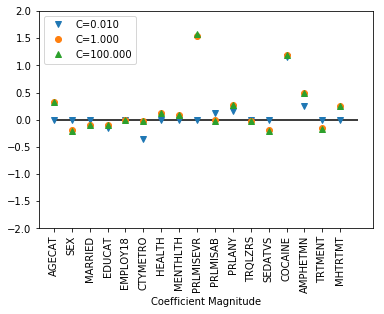

In [11]:
for C, marker in zip([0.01, 1, 100], ['v', 'o', '^']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of L1 logreg with C={:.3f}: {:.3f}".format(
        C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of L1 logreg with C={:.3f}: {:.3f}".format(
        C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    
plt.xticks(range(opioids.data.shape[1]), features, rotation=90)
plt.hlines(0,0, opioids.data.shape[1])
plt.xlabel("Coefficient Index")
plt.xlabel("Coefficient Magnitude")

plt.ylim(-2, 2)
plt.legend()

# Part 3. Decision Trees Classifier
## Building decision tree 
* Continues until all leaves are pure leads to models that are complex, overfit
* Presence of pure leaves means the tree is 100% accurate on the training set
* Each data point in training set is in a leaf that has the correct majority class

### Pre-pruning:  to Prevent Overfitting 
* Stopping creation of tree early
* Limiting the maximum depth of the tree, or limiting maximum number of leaves
* Requiring a minimum number of points in a node to keep splitting it

## 3.1 Build Decision Trees Classifier Model for Heroin
* Import package: `DecisionTreeClassifier`
* Build model using default setting that fully develops tree until all leaves are pure
* Fix the `random_state` in the tree, for breaking ties internally

In [12]:
from IPython.display import Image, display
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

## 3.2 Evaluate Tree Classifier model on Test set 

In [13]:
print("Accuracy on the training: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training: 0.999
Accuracy on the test set: 0.974


## 3.3 Adjust Parameter Settings
* Training set accuracy is 100% because leaves are pure
* Trees can become arbitrarily deep, complex, if depth of the tree is not limmited
* Unpruned trees are proone to overfitting and not generalizing well to new data

### Pruning: Set max_depth=4
* Tree depth is limited to 4 branches
* Limiting depth of the tree decreases overfitting 
* Results in lower accuracy on training set, but improvement on test set

In [14]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on the training: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on the test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on the training: 0.985
Accuracy on the test set: 0.984


## 3.4 Visualizing Decision Tree Classifier
* Visualize the tree using export_graphviz function from trees module
* Set an option to color the nodes to reflect majority class in each node
* First, install graphviz at terminal using brew install graphviz

In [15]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["Yes", "No"],
                feature_names=features, impurity=False, filled=True)

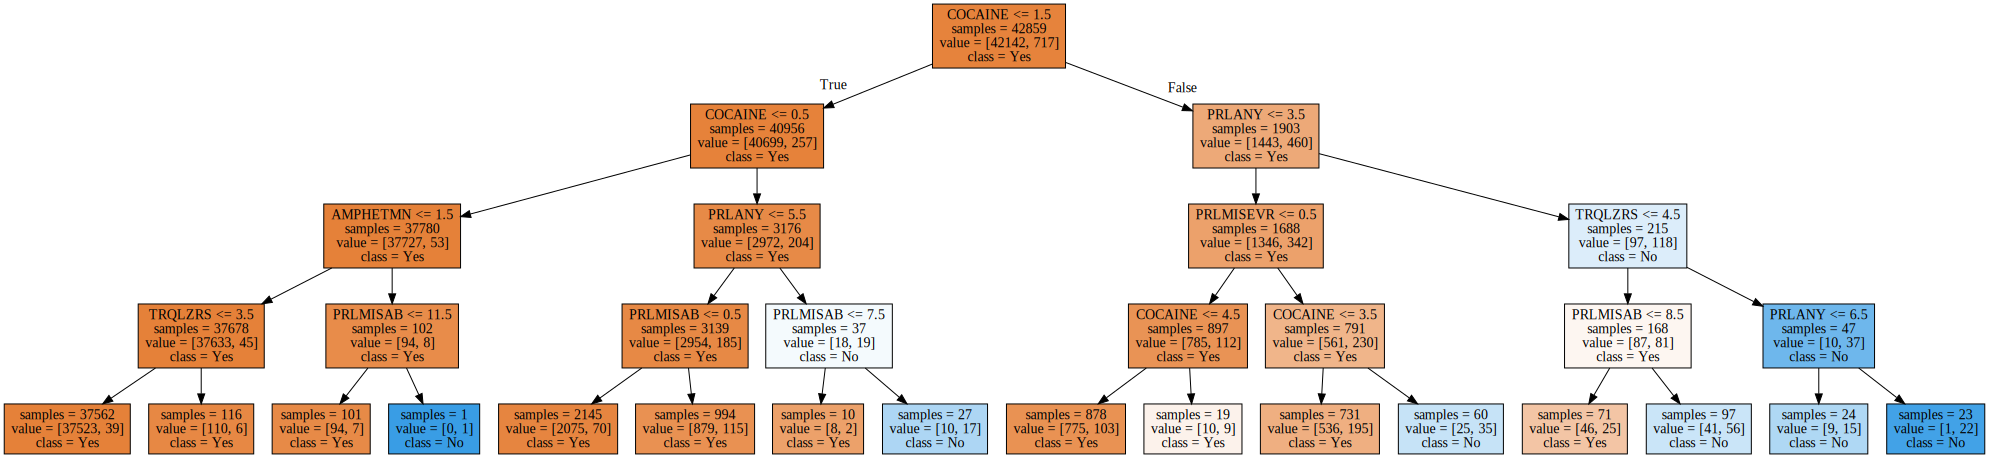

In [16]:
from IPython.display import display

import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

## Feature Importance in Trees
* Relates how important each feature is for the decision a tree makes
* Values range from 0 = "Not at all", to 1 = perfectly predicts target"
* Feature importances always sum to a total of 1.

## 3.5 Visualize Feature Importancee
* Similar to how we visualized coefficients in linear model
* Features used in top split ("worst radius") is most important feature
* Features with low importance may be redundant with another feature that encodes same info 

In [17]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.06541843  0.05071549  0.17928188  0.02100762  0.
  0.68014547  0.0034311   0.          0.        ]


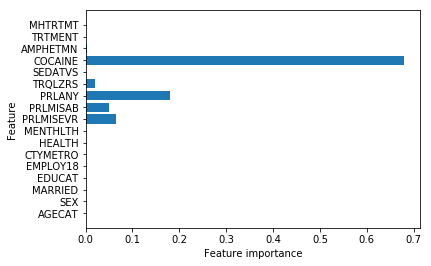

In [18]:
def plot_feature_importances_heroin(model):
    n_features = opioids.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

plot_feature_importances_heroin(tree)

# Part 4. Random Forests Classifier
* Random forest gives better accuracy than linear models or single decision tree, without tuning any parameters

## Building Random Forests
* First, need to decide how many trees to build: `n_estimators` parameter
* Trees are built independently of each other, based on "bootstrap" samples: `n_samples`
* Algorithm randomly selects subset of features, number determined by `max_features` paramter
* Each node of tree makes decision involving different subset of features

### Bootstrap Sampling and Subsets of Features
* Each decision tree in random forest is built on slightly different dataset
* Each split in each tree operates on different subset of features

## Critical Parameter: max_features
* If `max_features` set to `n_features`, each split can look at all features inthe dataset, no randomness in selection
* High `max_features` means the trees in a random forest will be quite similar
* Low `max_feature` means trees in random forest will be quite different

### Prediction with Random Forests
* Algorithm first makes prediction for every tree in the forest
* For classification, a "soft voting" is applied, probabilities for all trees are then averaged, and class with highest probability is predicted

## 3.1 Build Random Forests Classifier: Heroin
* Split data into train and test sets; 
* set `n_estimators` to 100 trees; build model on the training set

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

## 3.2 Evaluate Random Forests Classifier on Test set

In [20]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.999
Accuracy on test set: 0.984


## 3.3 Features Importance for Random Forest
* Computed by aggregating the feature importances over the trees in the forest
* Feature importances provided by Random Forest are more reliable than provided by single tree
* Many more features have non-zero importance than single tree, chooses similar features

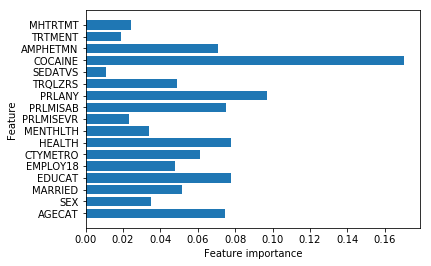

In [21]:
plot_feature_importances_heroin(forest)

# Part 5. Gradient Boosted Classifier Trees
* Works by building trees in a serial manner, where each tree tries to correct for mistakes of previous ones
* Main idea: combine many simple models, shallow trees ('weak learners'); more tree iteratively improves performance

### Parameters
* Pre-pruning, and number of trees in ensemble
* learning_rate parameter controls how strongly each tree tries to correct mistakes of previous trees
* Add more trees to model with n_estimators, increases model complexity

## 5.1 Build Gradient Boosting Classifier for Heroin
With 100 trees, of maximum depth 3, and learning rate of 0.1

In [22]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0, n_estimators=100, max_depth=3, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=0,
              subsample=1.0, verbose=0, warm_start=False)

## 5.2 Feature Importance
* With 100 trees, cannot inspect them all, even if maximum depth is only 1

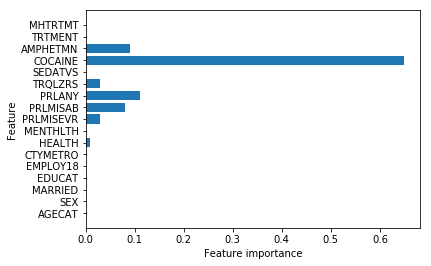

In [23]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_heroin(gbrt)